In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./data/preprocessed_data.csv")
df

,name,brand,price,rating,search_input
0,men pack 3 solid ankle-length socks,Jockey,389,4.4,Socks
1,men 3 ankle-length socks,ADIDAS,395,4.4,Socks
2,pack 5 ankle length socks,HRX by Hrithik Roshan,406,4.4,Socks
3,sport men set 3 crew socks,Jockey,479,4.5,Socks
4,men pack 3 ankle socks,HRX by Hrithik Roshan,232,4.5,Socks
...,...,...,...,...,...
13170,self design poncho,Soch,899,4.3,Ponchos
13171,women green self design poncho,JoE Hazel,1133,0.0,Ponchos
13172,women cable knit poncho,JoE Hazel,1382,3.9,Ponchos
13173,women fair isle poncho,JoE Hazel,1133,4.5,Ponchos


In [16]:
k = df.groupby("brand")["rating"].mean().sort_values(ascending=False) 
better = k[k>4]
worse = k[k<1]

In [43]:
better_brands = []
for each in better.keys():
    if(df[df["brand"] == each].shape[0] > 30):
        better_brands.append(each)

In [44]:
worse_brands = []
for each in worse.keys():
    if(df[df["brand"] == each].shape[0] > 30):
        worse_brands.append(each)

In [45]:
worse_brands

['REDESIGN',
 'LOOM LEGACY',
 'Karwan',
 'THE CLOWNFISH',
 'StyleCast',
 'SHOWOFF',
 'LULU & SKY']

In [46]:
better_brands

['Lino Perros',
 'Jockey',
 'U.S. Polo Assn.',
 'Lavie',
 'DAMENSCH',
 'SASSAFRAS',
 'XYXX',
 'Zaveri Pearls',
 'Kook N Keech',
 'MUTAQINOTI',
 'Red Tape',
 'Voyage']

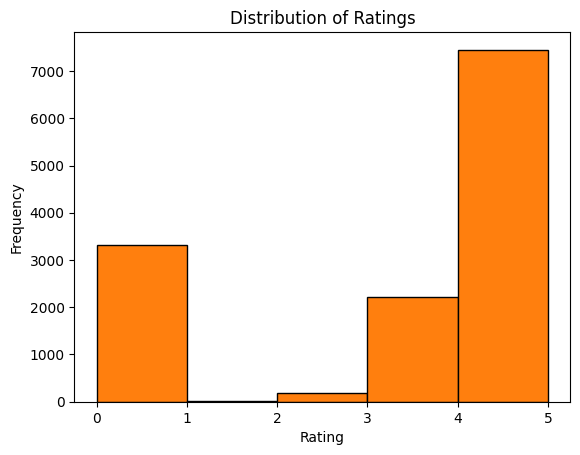

In [50]:
plt.hist(df["rating"], bins=5, color='tab:orange', edgecolor='black')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [52]:
k = df.groupby("brand")["price"].mean().sort_values(ascending=False) 

expensive = k[k>5000]
cheap = k[k<1000]

In [56]:
expensive

brand
CANDERE A KALYAN JEWELLERS COMPANY    22849.000000
Matinique                             18579.000000
Bruun & Stengade                      12149.000000
Chandbaali                             8499.000000
Iconic                                 7999.000000
LUXURAZI                               6466.333333
Luxrio                                 5999.000000
Name: price, dtype: float64

In [57]:
cheap

brand
Berrylush BIZwear    999.5
VOXATI               999.0
Rodzen               999.0
SG LEMAN             999.0
Zink London          999.0
                     ...  
FRENCHIE             238.0
M&H Easy             231.0
DIXCY SCOTT          222.0
Rupa                 216.0
Anoma                179.0
Name: price, Length: 733, dtype: float64

In [58]:
expensive_brands = []
for each in expensive.keys():
    expensive_brands.append(each)

In [74]:
cheap_brands = []
for each in cheap.keys():
    if(df[df["brand"] == each].shape[0] > 150):
        cheap_brands.append(each)

In [75]:
expensive_brands

['CANDERE A KALYAN JEWELLERS COMPANY',
 'Matinique',
 'Bruun & Stengade',
 'Chandbaali',
 'Iconic',
 'LUXURAZI',
 'Luxrio']

In [76]:
cheap_brands

['Tokyo Talkies',
 'HERE&NOW',
 'Mast & Harbour',
 'HIGHLANDER',
 'HRX by Hrithik Roshan',
 'Roadster',
 'Smarty Pants',
 'DressBerry',
 'Jockey']

/var/folders/vd/kwz4wr557gnbxr_vg2mjgxl40000gn/T/ipykernel_30184/2574020257.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(expensive_brands, rotation=90)
/var/folders/vd/kwz4wr557gnbxr_vg2mjgxl40000gn/T/ipykernel_30184/2574020257.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(cheap_brands, rotation=90)


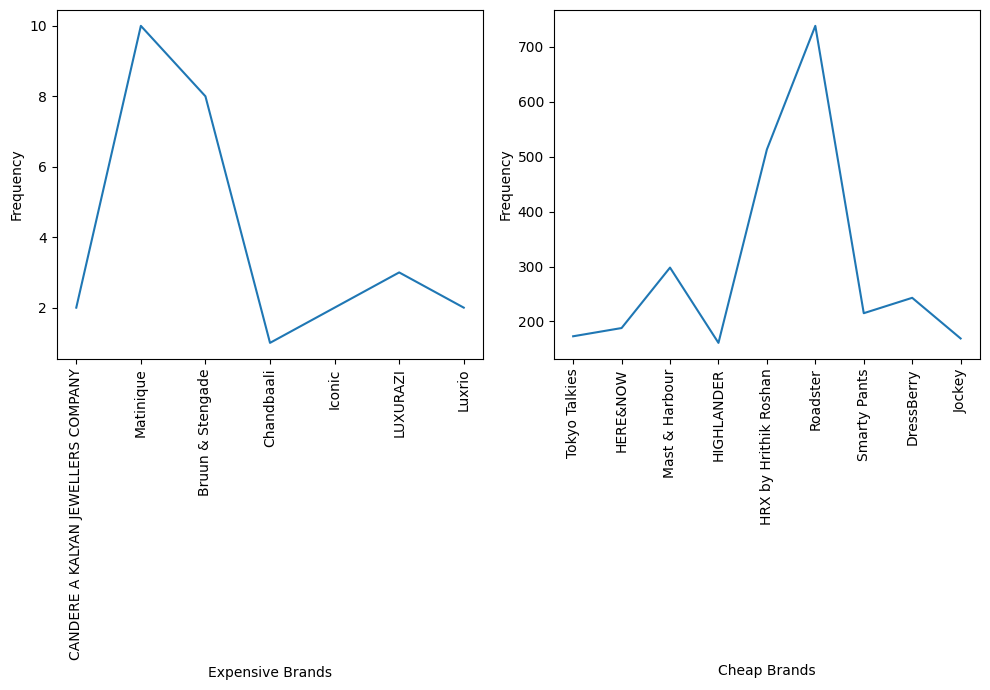

In [94]:
y1 = [df[df["brand"] == each].shape[0] for each in expensive_brands]
y2 = [df[df["brand"] == each].shape[0] for each in cheap_brands]

fig, ax = plt.subplots(1, 2, figsize=(10, 7))

ax[0].plot(expensive_brands, y1)
ax[0].set_xticklabels(expensive_brands, rotation=90)
ax[0].set_xlabel('Expensive Brands')
ax[0].set_ylabel('Frequency')

ax[1].plot(cheap_brands, y2)
ax[1].set_xticklabels(cheap_brands, rotation=90)
ax[1].set_xlabel('Cheap Brands',labelpad=100)
ax[1].set_ylabel('Frequency')

plt.tight_layout()

plt.show()

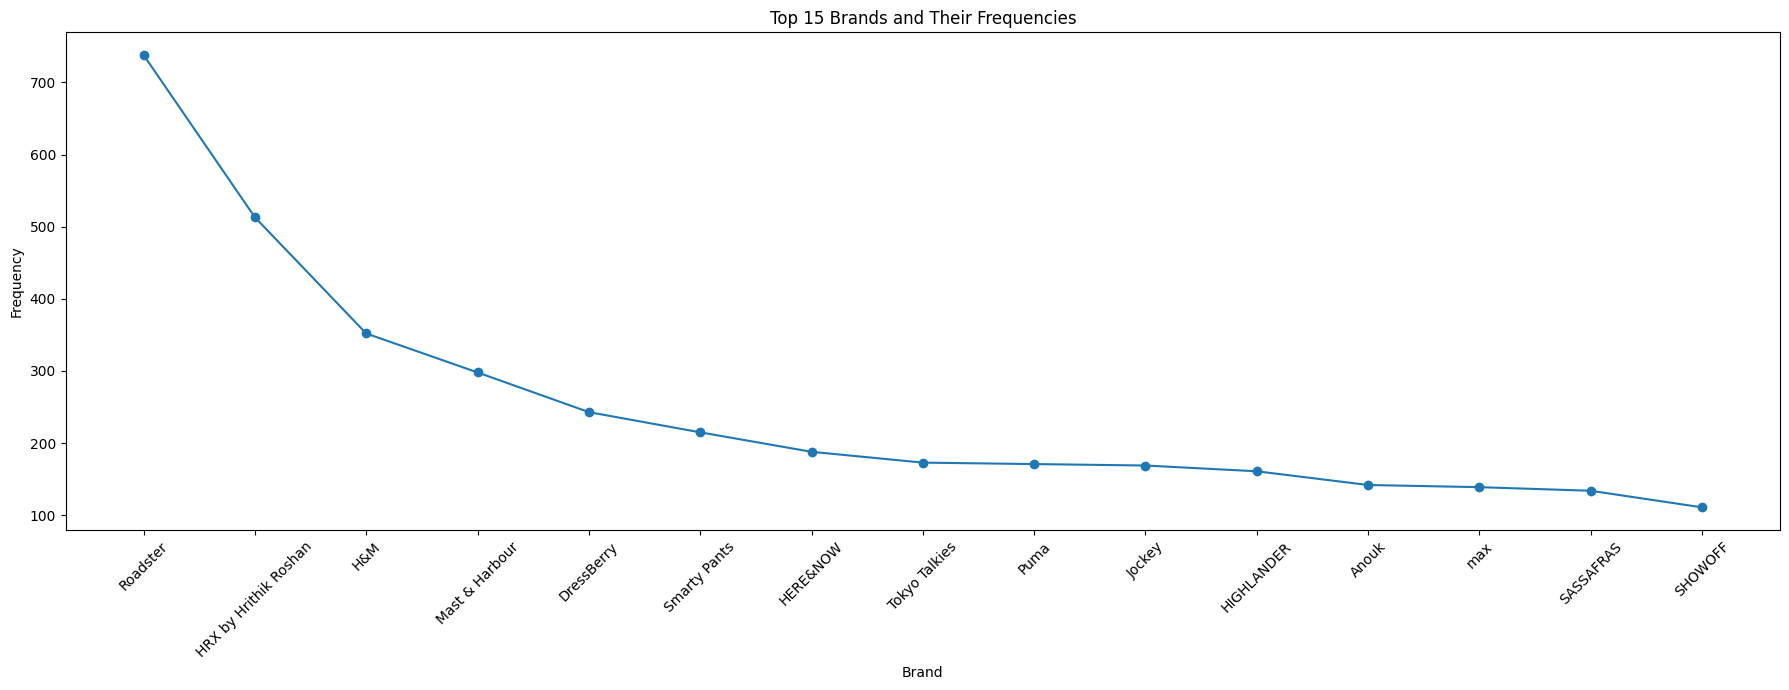

In [107]:
k = df["brand"].value_counts()[:15]

plt.figure(figsize=(18,7))
plt.plot(k.keys(), k.values)
plt.scatter(k.keys(), k.values)
plt.xticks(rotation=45)
plt.xlabel('Brand')
plt.ylabel('Frequency')
plt.title('Top 15 Brands and Their Frequencies')
plt.tight_layout()
plt.show()